# Analysis of Aerodyne CO2 Isotope Instrument's Accuracy and Data Validity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

## Picarro & Loflo CO2 Cleaning

In [2]:
df = pd.read_csv('co2.csv')
df = df.drop(columns='Unnamed: 4')
df['Date'] = pd.to_datetime(df['Date'])
df.head(), df.dtypes

(                 Date      Loflo Picarro1 CO2 Dry Picarro2 CO2 Dry
 0 2019-01-01 00:00:00                     404.374          403.449
 1 2019-01-01 00:01:00                     404.366          403.435
 2 2019-01-01 00:02:00                     404.375          403.437
 3 2019-01-01 00:03:00                     404.364          403.443
 4 2019-01-01 00:04:00                     404.367          403.435,
 Date                datetime64[ns]
 Loflo                       object
 Picarro1 CO2 Dry            object
 Picarro2 CO2 Dry            object
 dtype: object)

In [3]:
newdf = df
newdf = newdf.drop(newdf.loc[(newdf['Date'].dt.date < date(2021, 1, 1)) | (newdf['Date'].dt.date > date(2021, 12, 31))].index)
newdf = newdf.reset_index(drop=True)
newdf = newdf.set_index('Date')
newdf['Loflo'] = pd.to_numeric(newdf['Loflo'], errors='coerce')
newdf['Picarro1 CO2 Dry'] = pd.to_numeric(newdf['Picarro1 CO2 Dry'], errors='coerce')
newdf['Picarro2 CO2 Dry'] = pd.to_numeric(newdf['Picarro2 CO2 Dry'], errors='coerce')
newdf = newdf.drop(newdf.loc[(newdf['Loflo'] >= 500) | (newdf['Loflo'] <= 350)].index)
newdf = newdf.drop(newdf.loc[(newdf['Picarro1 CO2 Dry'] >= 500) | (newdf['Picarro1 CO2 Dry'] <= 350)].index)
newdf = newdf.drop(newdf.loc[(newdf['Picarro2 CO2 Dry'] >= 500) | (newdf['Picarro2 CO2 Dry'] <= 350)].index)
newdf.head(), newdf.dtypes

(                     Loflo  Picarro1 CO2 Dry  Picarro2 CO2 Dry
 Date                                                          
 2021-01-01 00:00:00    NaN           409.994           409.013
 2021-01-01 00:01:00    NaN           410.060           409.081
 2021-01-01 00:02:00    NaN           410.239           409.252
 2021-01-01 00:03:00    NaN           410.184           409.228
 2021-01-01 00:04:00    NaN           410.091           409.135,
 Loflo               float64
 Picarro1 CO2 Dry    float64
 Picarro2 CO2 Dry    float64
 dtype: object)

## Aerodyne Cleaning

In [4]:
aerodf = pd.read_csv('AeroDriftC.csv')
aerodf.head()

C:\Users\Jesse\AppData\Local\Temp\ipykernel_15212\3965057924.py:1: DtypeWarning: Columns (8,13,18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  aerodf = pd.read_csv('AeroDriftC.csv')


,time,bin_time,type,sample,standard,port,cavity_temp,cavity_press,626_C,626_wet,...,636_C,636_wet,636_dry,636_stdev,636_N,openpath_C,openpath_wet,openpath_dry,openpath_stdev,openpath_N
0,2019-08-15 01:23:30,2019-08-15 01:23,air,75m_inlet,UAN20150490,0,294.6317,47.5616,nan,nan,...,nan,nan,4.197145e+05,5.550320e+01,0.0,nan,nan,497639.1562,192.4899,0.0
1,2019-08-15 01:24:30,2019-08-15 01:24,cal,UAN20100784,UAN20150490,2,294.5967,53.5600,nan,nan,...,nan,nan,3.966485e+05,4.754283e+03,0.0,nan,nan,507193.3125,28130.6699,0.0
2,2019-08-15 01:25:30,2019-08-15 01:25,cal,UAN20100784,UAN20150490,2,294.8540,13.1881,nan,nan,...,nan,nan,3.365746e+05,7.316332e+04,0.0,nan,nan,431204.2812,89950.9062,0.0
3,2019-08-15 01:26:30,2019-08-15 01:26,cal,UAN20100784,UAN20150490,2,295.0227,0.1135,nan,nan,...,nan,nan,3.801171e+07,5.803078e+07,0.0,nan,nan,484331.1875,230.0945,0.0
4,2019-08-15 01:27:30,2019-08-15 01:27,cal,UAN20100784,UAN20150490,2,294.6424,64.6393,nan,nan,...,nan,nan,3.650816e+07,1.368332e+08,0.0,nan,nan,640761.5000,325850.4688,0.0


In [5]:
aerodf = aerodf[[' bin_time', ' 626_C']]
aerodf = aerodf.rename(columns={" bin_time": "Date", " 626_C": "626_C"})
aerodf['Date'] = pd.to_datetime(aerodf['Date'])
aerodf['626_C'] = pd.to_numeric(aerodf['626_C'], errors='coerce')
inverseAbundance = 1.01605365
aerodf['626_C'] = aerodf['626_C'] * inverseAbundance
# aerodf = aerodf.drop(aerodf.loc[(aerodf['Date'].dt.date < date(2021, 1, 1)) | (aerodf['Date'].dt.date > date(2021, 12, 31))].index)
aerodf = aerodf.reset_index(drop=True)
aerodf = aerodf.set_index('Date')
aerodf = aerodf.drop(aerodf[aerodf.index.duplicated()].index)
aerodf = aerodf.drop(aerodf.loc[(aerodf['626_C'] >= 500) | (aerodf['626_C'] <= 350)].index)
aerodf.head()

,626_C
Date,
2019-08-15 01:23:00,NaN
2019-08-15 01:24:00,NaN
2019-08-15 01:25:00,NaN
2019-08-15 01:26:00,NaN
2019-08-15 01:27:00,NaN


## Aerodyne CO2 Record

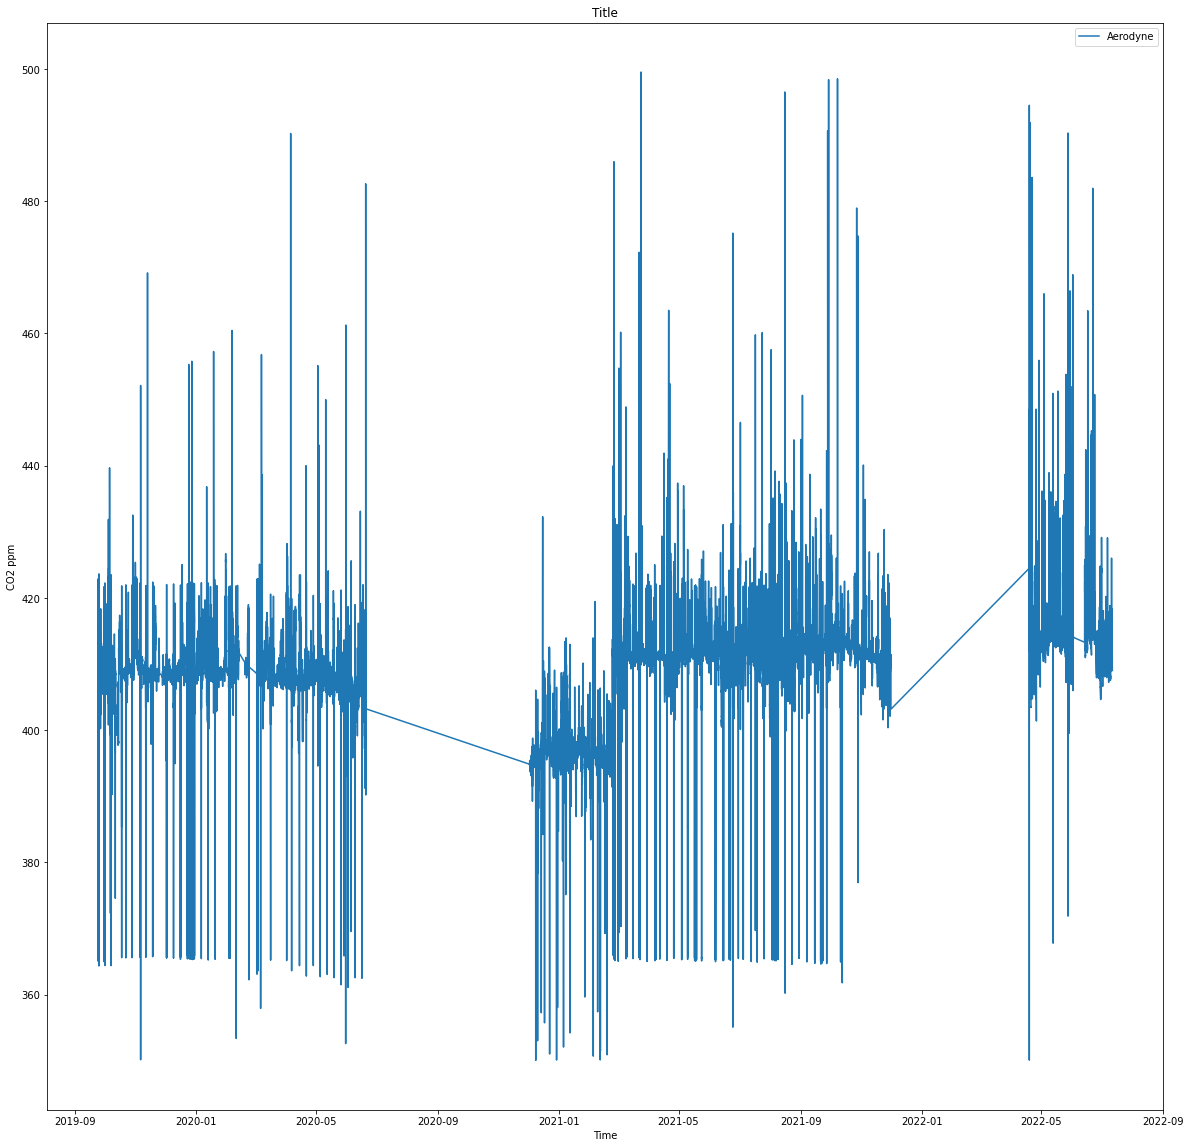

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(aerodf.index, aerodf['626_C'], label='Aerodyne')
plt.xlabel('Time')
plt.ylabel('CO2 ppm')
plt.title('Title')
plt.legend()

The Aerodyne CO2 data has massive holes in it that will make comparison to known CO2 records difficult. For this reason, only the 2021 data will be used as it is the longest continuous data timeframe.

In [7]:
cleanaerodf = aerodf # This is a cleaned aerodyne df that has no dates selected so it can be used later for various dates
aerodf = aerodf.drop(aerodf.loc[(aerodf.index.date < date(2021, 1, 1)) | (aerodf.index.date > date(2021, 12, 31))].index)

## Comparing Statistical Values of CO2 Records for 2021

In [8]:
vardf = newdf.resample('M', label='right').var()
stddf = newdf.resample('M', label='right').std()
meddf = newdf.resample('M', label='right').median()
meandf = newdf.resample('M', label='right').mean()

driftvardf = aerodf.resample('M', label='right').var()
driftstddf = aerodf.resample('M', label='right').std()
driftmeddf = aerodf.resample('M', label='right').median()
driftmeandf = aerodf.resample('M', label='right').mean()

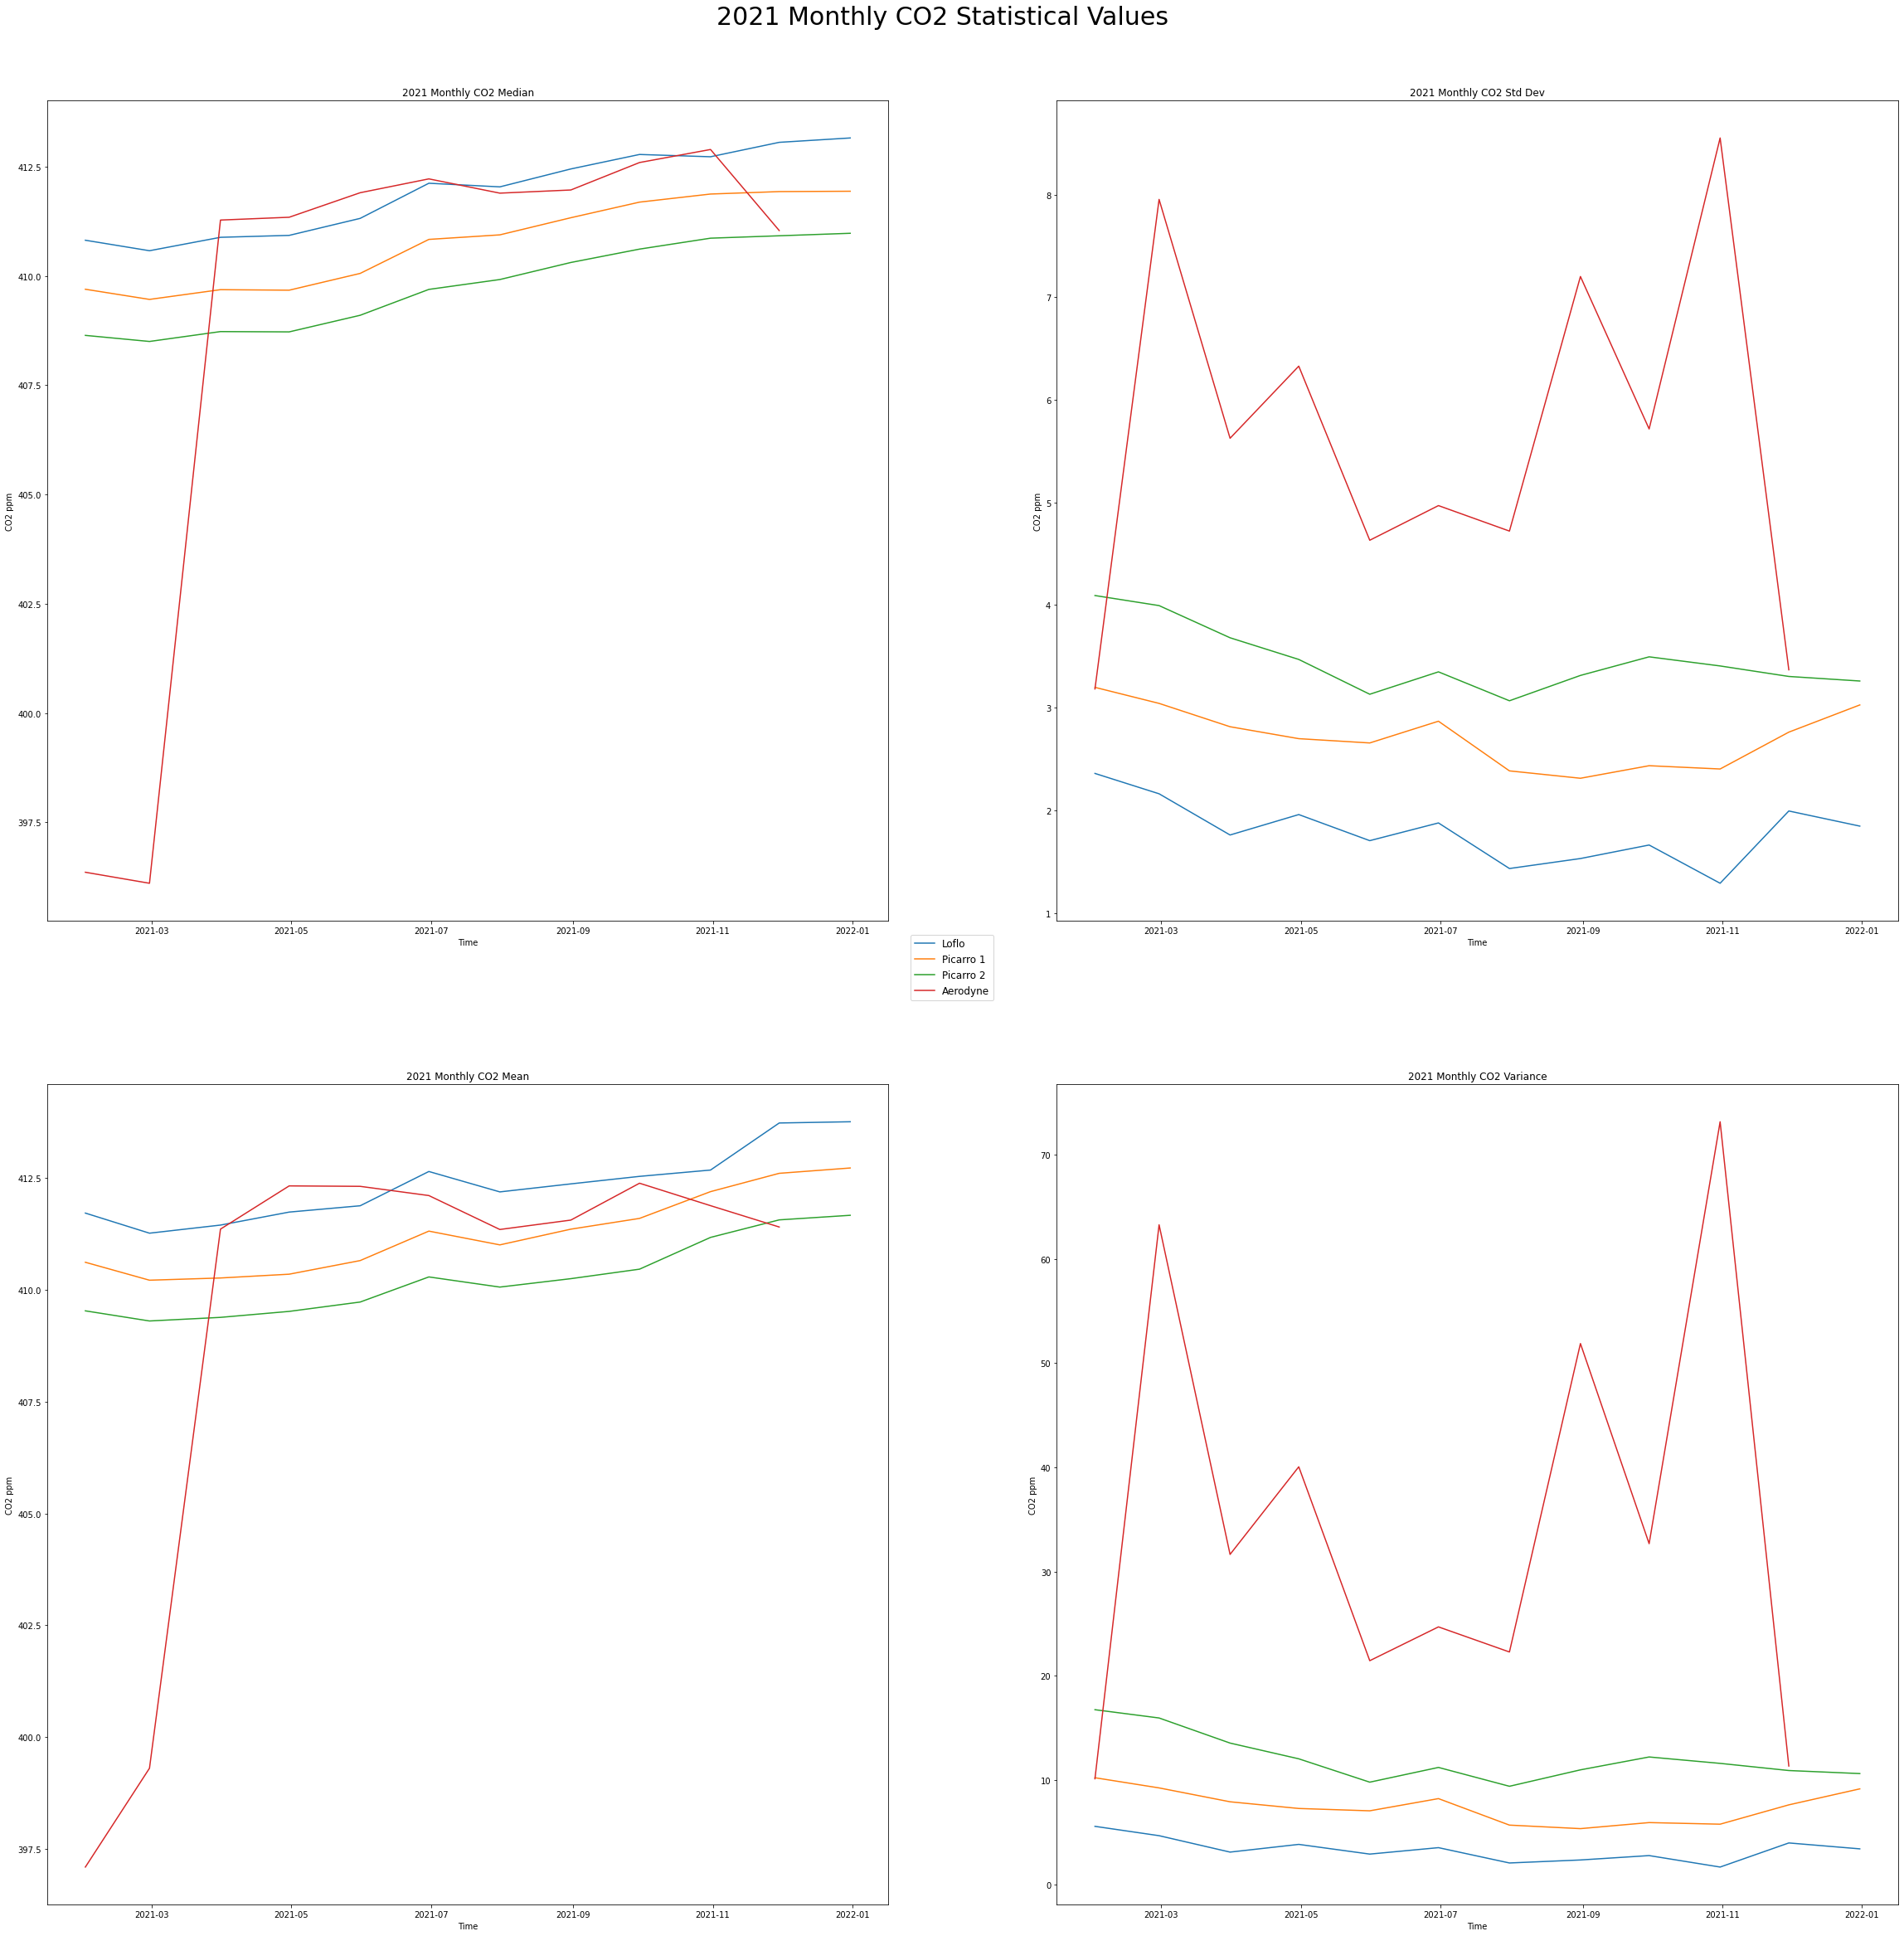

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(40, 40))
axs[0, 0].plot(meddf.index, meddf['Loflo'], label='Loflo')
axs[0, 0].plot(meddf.index, meddf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[0, 0].plot(meddf.index, meddf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[0, 0].plot(driftmeddf.index, driftmeddf['626_C'], label='Aerodyne')
axs[0, 0].set_title('2021 Monthly CO2 Median')

axs[0, 1].plot(stddf.index, stddf['Loflo'], label='Loflo')
axs[0, 1].plot(stddf.index, stddf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[0, 1].plot(stddf.index, stddf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[0, 1].plot(driftstddf.index, driftstddf['626_C'], label='Aerodyne')
axs[0, 1].set_title('2021 Monthly CO2 Std Dev')

axs[1, 0].plot(meandf.index, meandf['Loflo'], label='Loflo')
axs[1, 0].plot(meandf.index, meandf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[1, 0].plot(meandf.index, meandf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[1, 0].plot(driftmeandf.index, driftmeandf['626_C'], label='Aerodyne')
axs[1, 0].set_title('2021 Monthly CO2 Mean')

axs[1, 1].plot(vardf.index, vardf['Loflo'], label='Loflo')
axs[1, 1].plot(vardf.index, vardf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[1, 1].plot(vardf.index, vardf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[1, 1].plot(driftvardf.index, driftvardf['626_C'], label='Aerodyne')
axs[1, 1].set_title('2021 Monthly CO2 Variance')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='center', fontsize='large')
fig.suptitle('2021 Monthly CO2 Statistical Values', fontsize=30, y=0.92)


for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='CO2 ppm')

#### Initial Thoughts
As could also be seen from the Aerodyne GCWerks data, there is a large jump in the first quarter of 2021. Looking at the mean and median it is assumed that during the first quarter there was an instrument error. Will attempt to find something that was changed in this period. The primary jump was somewhere from 2021-02-19 to 2021-03-05. A decent dropoff again around October.

#### Logbook Cross-reference
After looking in the logbook, there was a fridge issue that was rectified at the end of March 2021. This correlates nicely with the jump in CO2 measurements seen in the graphs. Again around October there were ongoing fridge issues. There does appear to be an observable relationship between Aerodyne CO2 measurements being around what they're meant to be when no fridge issues are being recorded. Looking at the variance and standard deviation plots, the two largest spikes also occur around the same time periods as the fridge faults. So for now it is assumed that fridge/air dehumidification factors are what causes the largest data errors. In saying this, even when CO2 data is around the mean/median of known good CO2 records like Picarro and Loflo, the exact trend does not follow the other instruments.

In [10]:
Wvardf = newdf.resample('W', label='right').var()
Wstddf = newdf.resample('W', label='right').std()
Wmeddf = newdf.resample('W', label='right').median()
Wmeandf = newdf.resample('W', label='right').mean()

Wdriftvardf = aerodf.resample('W', label='right').var()
Wdriftstddf = aerodf.resample('W', label='right').std()
Wdriftmeddf = aerodf.resample('W', label='right').median()
Wdriftmeandf = aerodf.resample('W', label='right').mean()

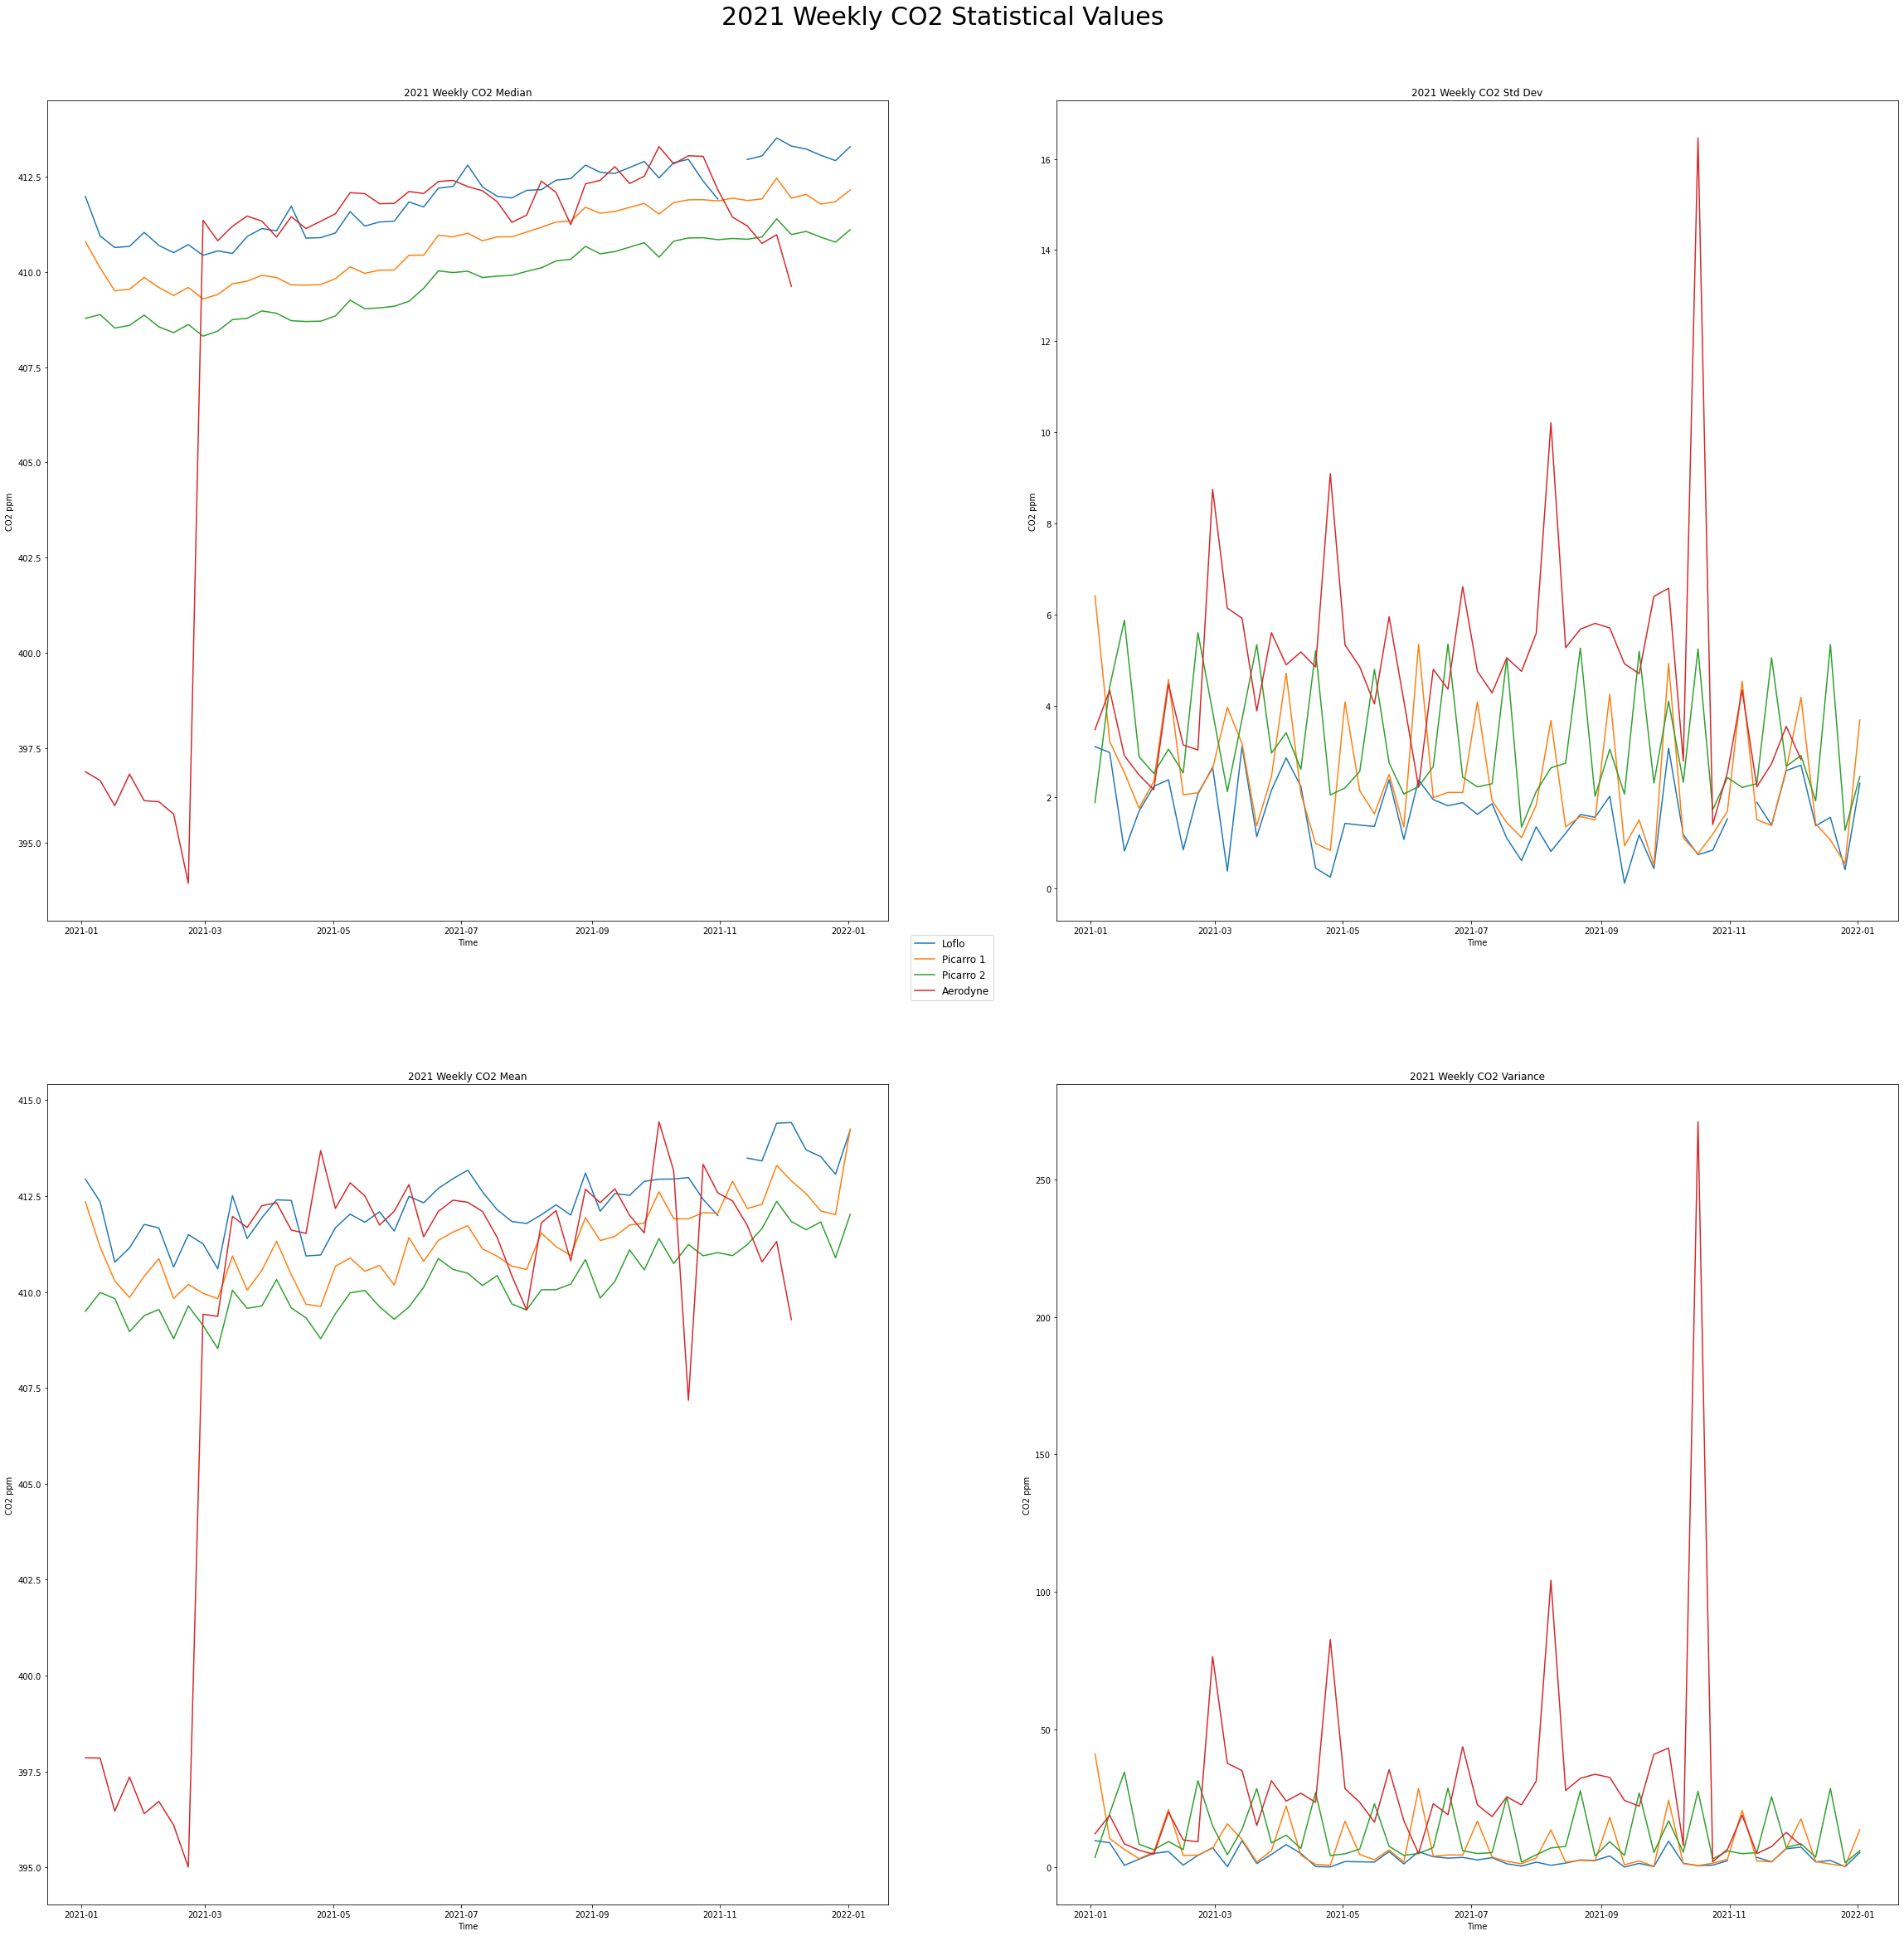

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(40, 40))
axs[0, 0].plot(Wmeddf.index, Wmeddf['Loflo'], label='Loflo')
axs[0, 0].plot(Wmeddf.index, Wmeddf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[0, 0].plot(Wmeddf.index, Wmeddf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[0, 0].plot(Wdriftmeddf.index, Wdriftmeddf['626_C'], label='Aerodyne')
axs[0, 0].set_title('2021 Weekly CO2 Median')

axs[0, 1].plot(Wstddf.index, Wstddf['Loflo'], label='Loflo')
axs[0, 1].plot(Wstddf.index, Wstddf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[0, 1].plot(Wstddf.index, Wstddf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[0, 1].plot(Wdriftstddf.index, Wdriftstddf['626_C'], label='Aerodyne')
axs[0, 1].set_title('2021 Weekly CO2 Std Dev')

axs[1, 0].plot(Wmeandf.index, Wmeandf['Loflo'], label='Loflo')
axs[1, 0].plot(Wmeandf.index, Wmeandf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[1, 0].plot(Wmeandf.index, Wmeandf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[1, 0].plot(Wdriftmeandf.index, Wdriftmeandf['626_C'], label='Aerodyne')
axs[1, 0].set_title('2021 Weekly CO2 Mean')

axs[1, 1].plot(Wvardf.index, Wvardf['Loflo'], label='Loflo')
axs[1, 1].plot(Wvardf.index, Wvardf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[1, 1].plot(Wvardf.index, Wvardf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[1, 1].plot(Wdriftvardf.index, Wdriftvardf['626_C'], label='Aerodyne')
axs[1, 1].set_title('2021 Weekly CO2 Variance')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='center', fontsize='large')
fig.suptitle('2021 Weekly CO2 Statistical Values', fontsize=30, y=0.92)

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='CO2 ppm')

#### Initial Thoughts
The weekly format as expected provides a more detailed view of when certain events occured. Can see the Aerodyne does follow the other instruments fairly well during some periods but it differs radically in others. The Aerodyne may be worth fixing as it clearly still has some capability of recording good data but it is a fragile machine that is likely to cause many further issues in the future. 

In [12]:
Dvardf = newdf.resample('D', label='right').var()
Dstddf = newdf.resample('D', label='right').std()
Dmeddf = newdf.resample('D', label='right').median()
Dmeandf = newdf.resample('D', label='right').mean()

Ddriftvardf = aerodf.resample('D', label='right').var()
Ddriftstddf = aerodf.resample('D', label='right').std()
Ddriftmeddf = aerodf.resample('D', label='right').median()
Ddriftmeandf = aerodf.resample('D', label='right').mean()

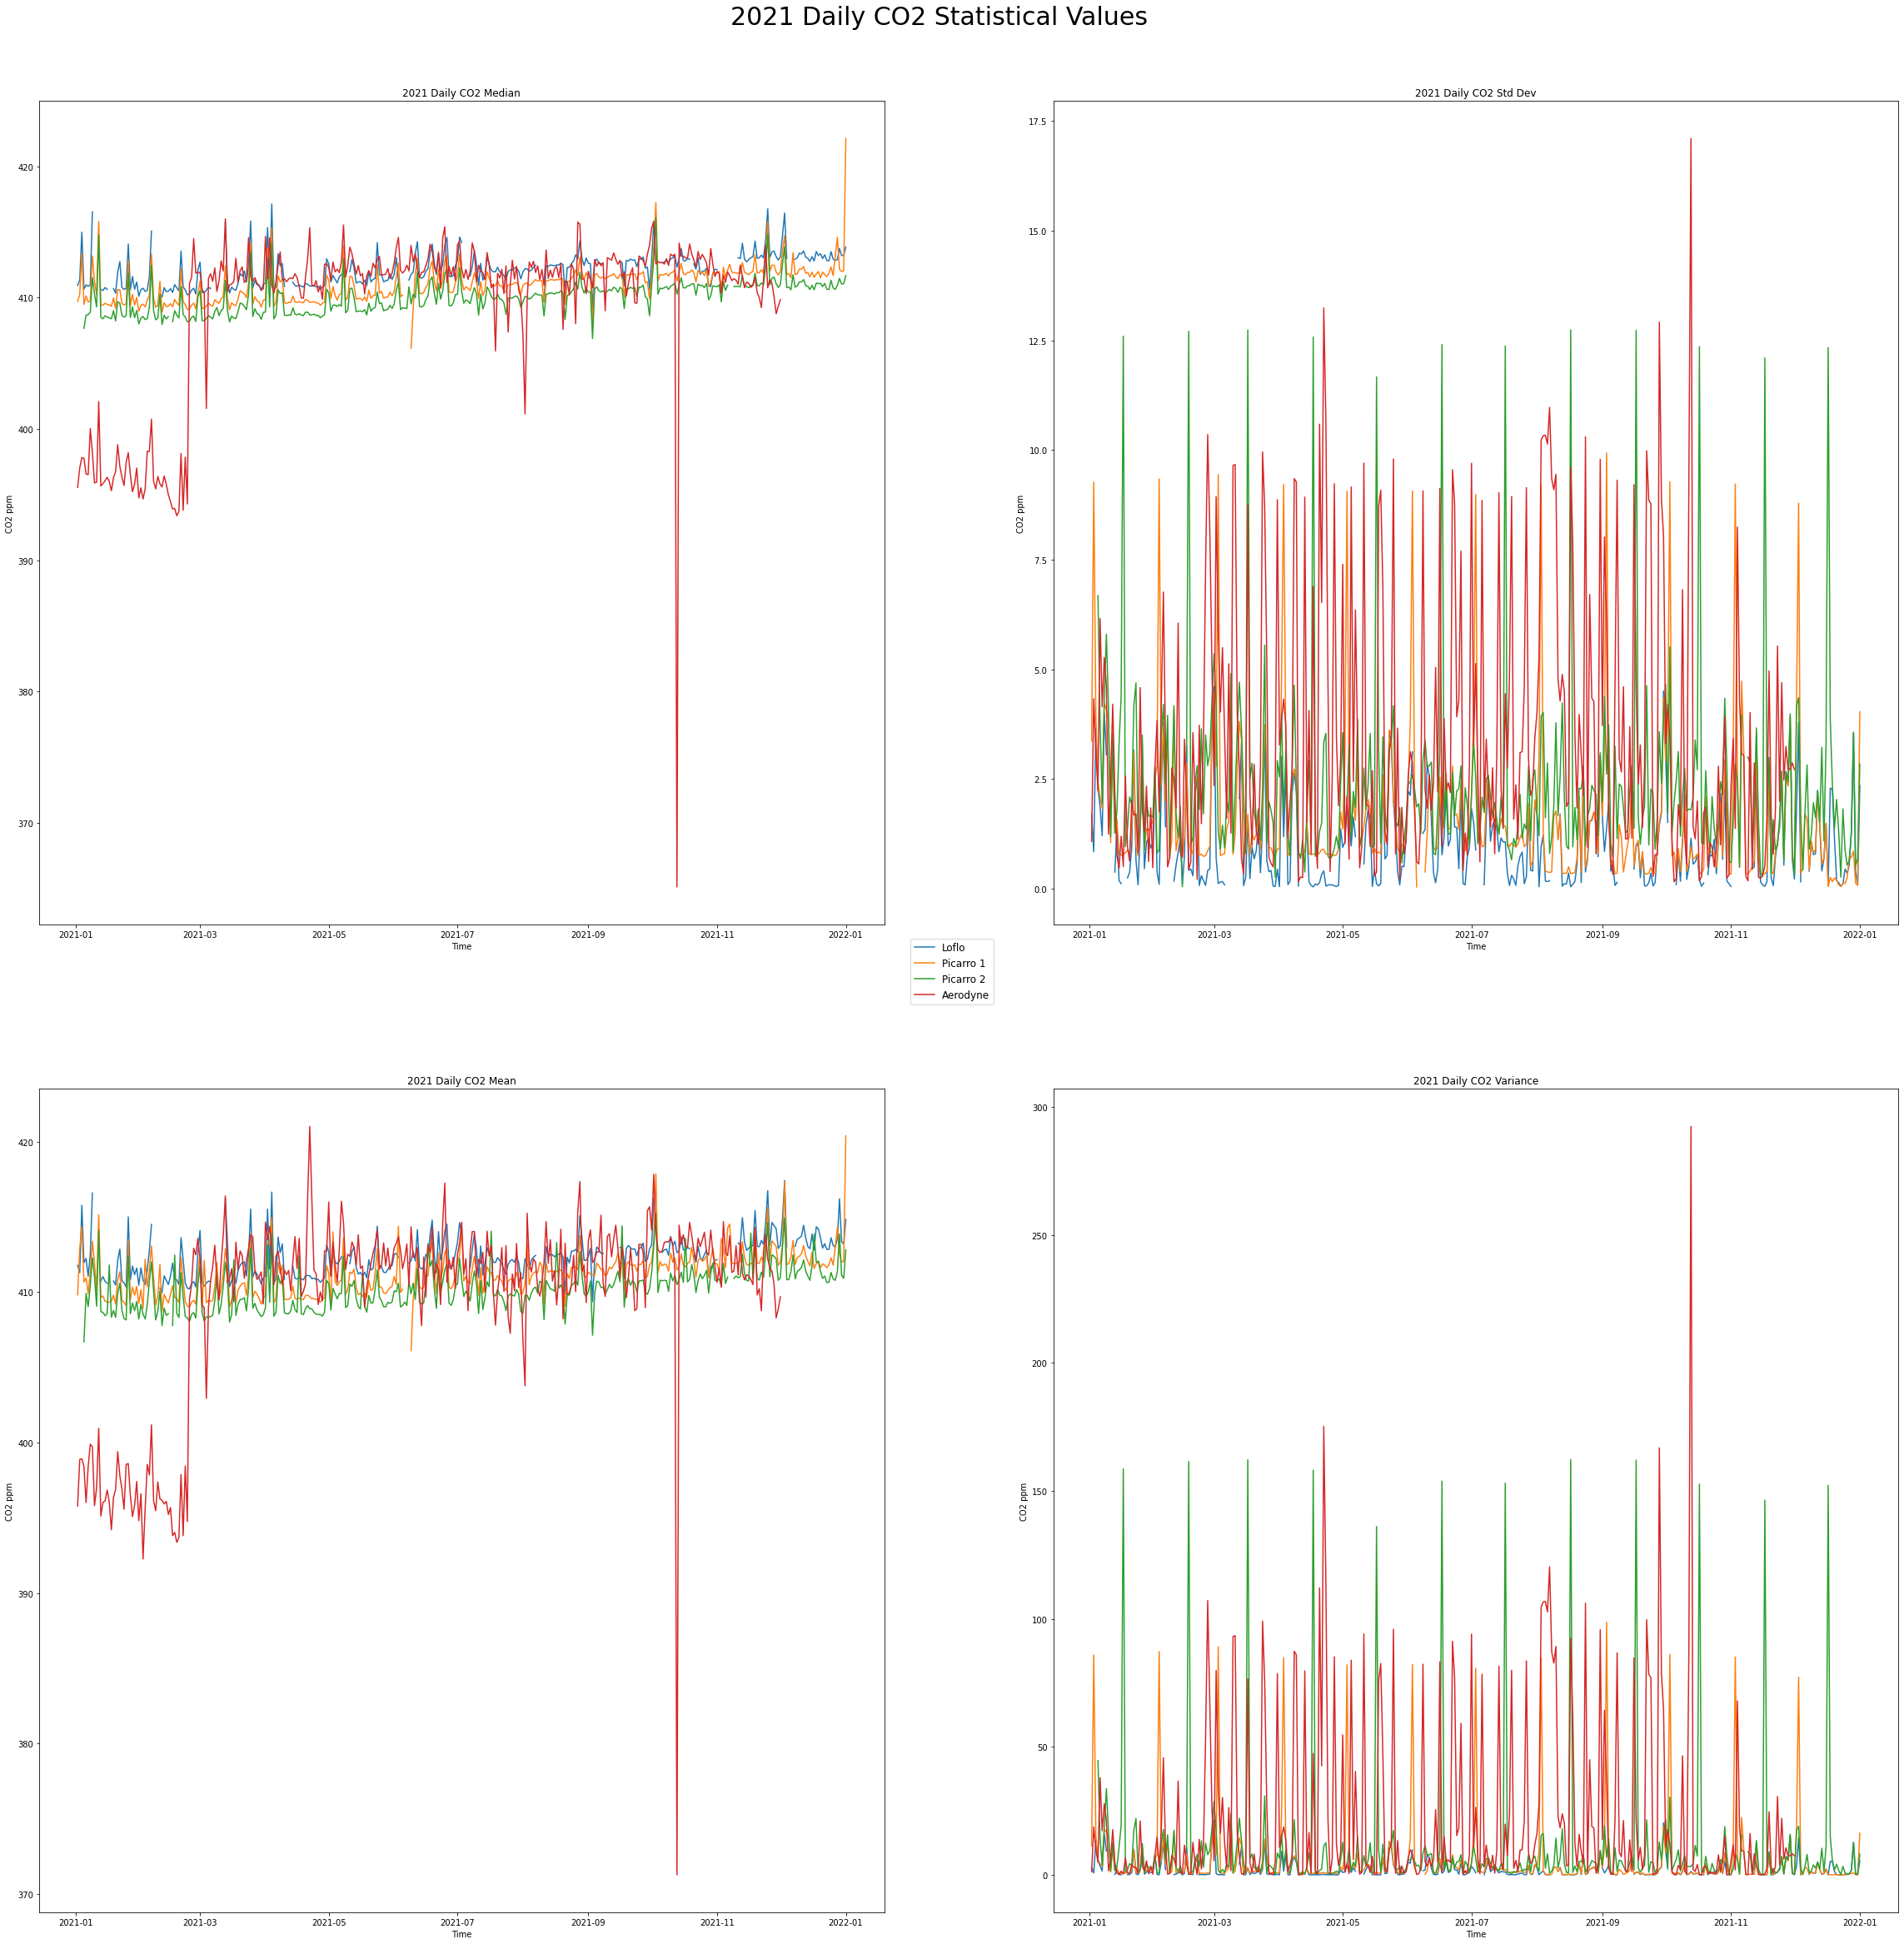

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(40, 40))
axs[0, 0].plot(Dmeddf.index, Dmeddf['Loflo'], label='Loflo')
axs[0, 0].plot(Dmeddf.index, Dmeddf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[0, 0].plot(Dmeddf.index, Dmeddf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[0, 0].plot(Ddriftmeddf.index, Ddriftmeddf['626_C'], label='Aerodyne')
axs[0, 0].set_title('2021 Daily CO2 Median')

axs[0, 1].plot(Dstddf.index, Dstddf['Loflo'], label='Loflo')
axs[0, 1].plot(Dstddf.index, Dstddf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[0, 1].plot(Dstddf.index, Dstddf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[0, 1].plot(Ddriftstddf.index, Ddriftstddf['626_C'], label='Aerodyne')
axs[0, 1].set_title('2021 Daily CO2 Std Dev')

axs[1, 0].plot(Dmeandf.index, Dmeandf['Loflo'], label='Loflo')
axs[1, 0].plot(Dmeandf.index, Dmeandf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[1, 0].plot(Dmeandf.index, Dmeandf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[1, 0].plot(Ddriftmeandf.index, Ddriftmeandf['626_C'], label='Aerodyne')
axs[1, 0].set_title('2021 Daily CO2 Mean')

axs[1, 1].plot(Dvardf.index, Dvardf['Loflo'], label='Loflo')
axs[1, 1].plot(Dvardf.index, Dvardf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[1, 1].plot(Dvardf.index, Dvardf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[1, 1].plot(Ddriftvardf.index, Ddriftvardf['626_C'], label='Aerodyne')
axs[1, 1].set_title('2021 Daily CO2 Variance')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='center', fontsize='large')
fig.suptitle('2021 Daily CO2 Statistical Values', fontsize=30, y=0.92)

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='CO2 ppm')

#### Initial Thoughts
Primarily looking at the mean and median graphs, the Aerodyne data appears to follow the CO2 record fairly well during the middle parts of the year. We will try to narrow the data down to this 'good' period to see how closely the Aerodyne compares.

In [14]:
DMiddriftmeandf = aerodf.loc[(aerodf.index.date >= date(2021, 5, 1)) & (aerodf.index.date < date(2021, 9, 1))].resample('12H', label='right').mean()
DMidmeandf = newdf.loc[(newdf.index.date >= date(2021, 5, 1)) & (newdf.index.date < date(2021, 9, 1))].resample('12H', label='right').mean()

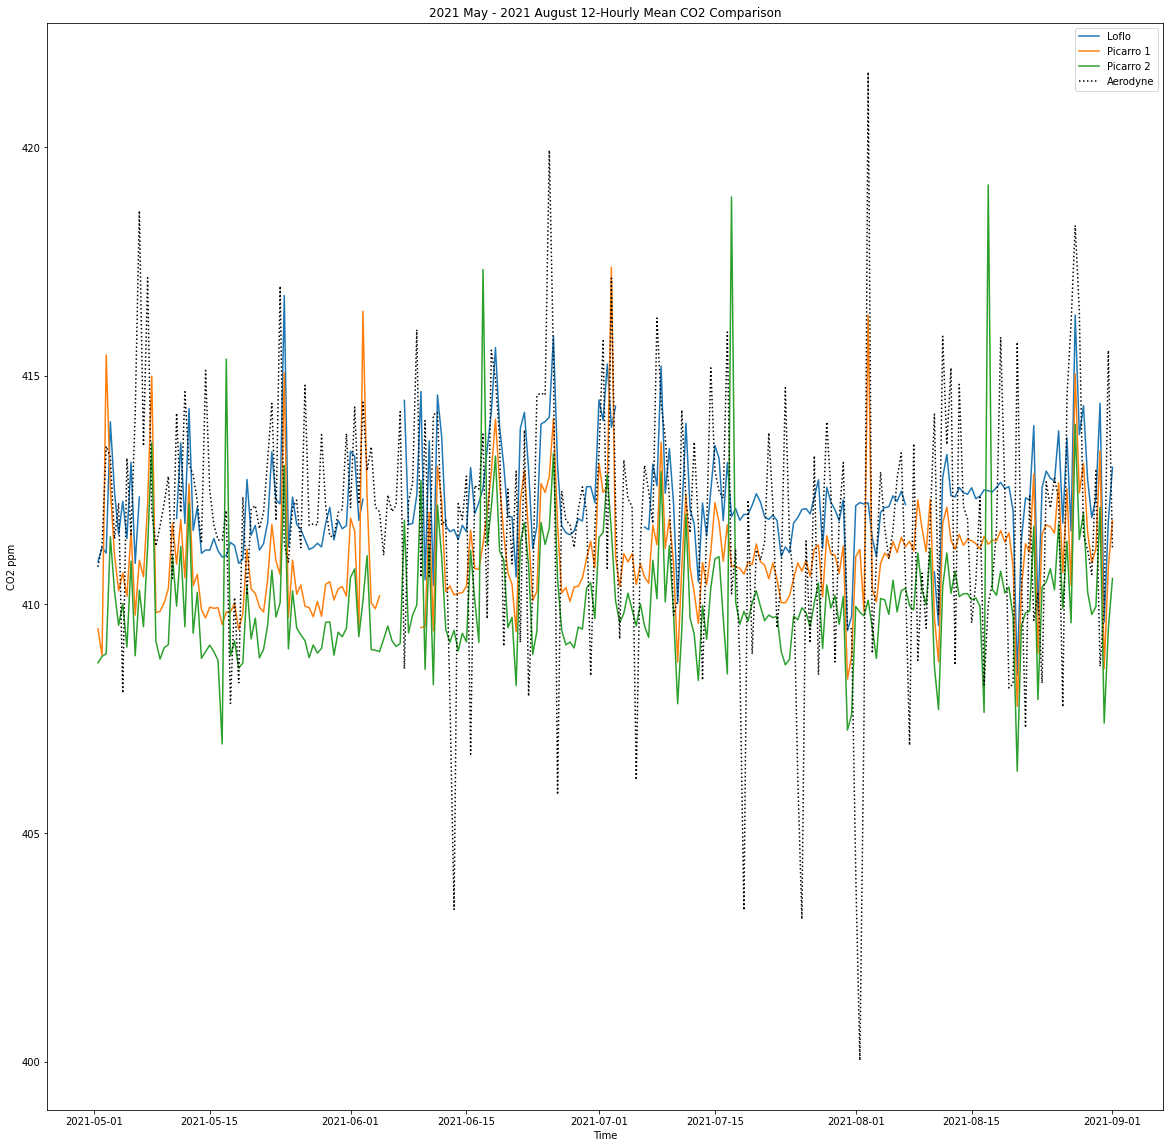

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(DMidmeandf.index, DMidmeandf['Loflo'], label='Loflo')
ax.plot(DMidmeandf.index, DMidmeandf['Picarro1 CO2 Dry'], label='Picarro 1')
ax.plot(DMidmeandf.index, DMidmeandf['Picarro2 CO2 Dry'], label='Picarro 2')
ax.plot(DMiddriftmeandf.index, DMiddriftmeandf['626_C'], label='Aerodyne', color='black', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('CO2 ppm')
plt.title('2021 May - 2021 August 12-Hourly Mean CO2 Comparison')
plt.legend()

#### Initial Thoughts
The known CO2 record instruments seem to have similar patterns no matter the time frame, whereas the Aerodyne always contains high variance, high max/mins. Perhaps it would be useful to generate a box-and-whisker plot as they are very useful in visualising these statistical values. First a new df will be created that contains all data, perhaps this should have been done earlier.

## Box and Whisker Plots

Box and whisker plots are typically not suited to timeseries data as in this case the data is expected to rise over time. This merely changes the interpretation of the plot. Instead of the traditional normal distribution assumption, a better assumption for interpreting this plot in this circumstance would be that values falling above the median are more likely to be values that appear later within the timeseries.

In [16]:
alldf = newdf
alldf['Aerodyne'] = aerodf['626_C']

,Loflo,Picarro1 CO2 Dry,Picarro2 CO2 Dry,Aerodyne
Date,,,,
2021-01-01 00:00:00,NaN,409.994,409.013,396.974092
2021-01-01 00:01:00,NaN,410.060,409.081,396.976530
2021-01-01 00:02:00,NaN,410.239,409.252,396.953059
2021-01-01 00:03:00,NaN,410.184,409.228,396.917294
2021-01-01 00:04:00,NaN,410.091,409.135,396.900224


In [17]:
HMidallmeandf = alldf.loc[(newdf.index.date >= date(2021, 5, 1)) & (alldf.index.date < date(2021, 9, 1))].resample('12H', label='right').mean()
Hallmeandf = alldf.resample('12H', label='right').mean()
Wallmeandf = alldf.resample('W', label='right').mean()

Text(0.5, 0, 'CO2 Instrument')

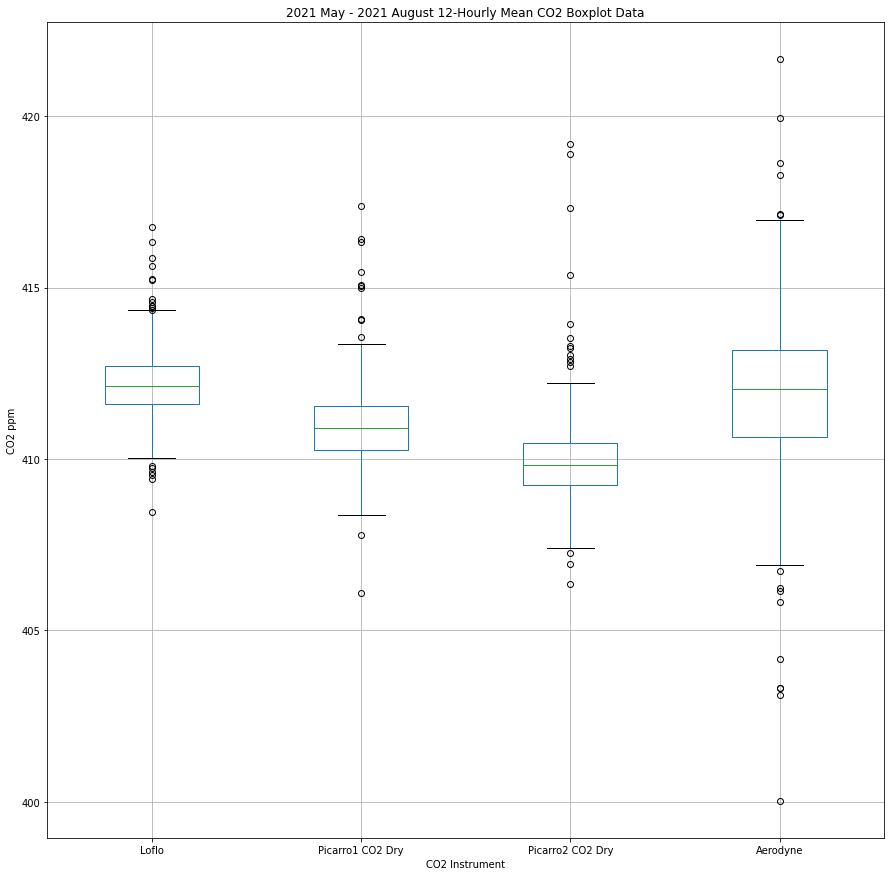

In [18]:
HMidallmeandf.boxplot(column=['Loflo', 'Picarro1 CO2 Dry', 'Picarro2 CO2 Dry', 'Aerodyne'], figsize=(15,15))
plt.title('2021 May - 2021 August 12-Hourly Mean CO2 Boxplot Data')
plt.ylabel('CO2 ppm')
plt.xlabel('CO2 Instrument')

count    668.000000
mean     409.432855
std        6.568038
min      364.363526
25%      409.072074
50%      411.442442
75%      413.010625
max      425.376374
Name: Aerodyne, dtype: float64

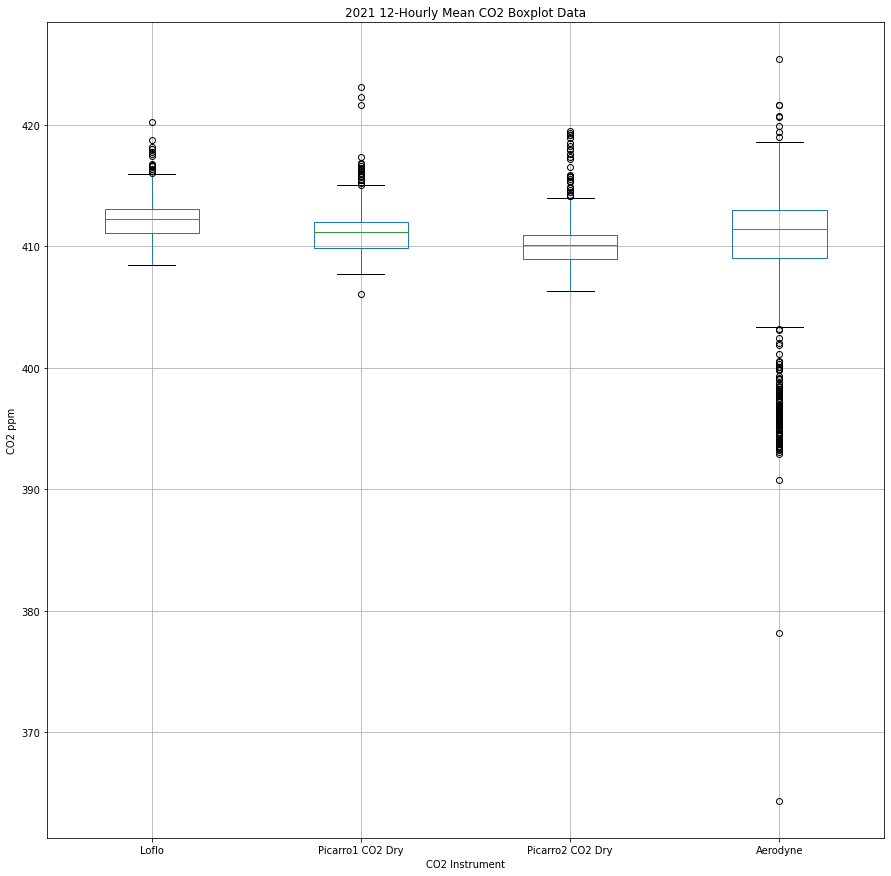

In [19]:
Hallmeandf.boxplot(column=['Loflo', 'Picarro1 CO2 Dry', 'Picarro2 CO2 Dry', 'Aerodyne'], figsize=(15,15))
plt.title('2021 12-Hourly Mean CO2 Boxplot Data')
plt.ylabel('CO2 ppm')
plt.xlabel('CO2 Instrument')
Hallmeandf['Aerodyne'].describe()

#### Initial Thoughts
Both the full 2021 data range and the selected mid-year data range show that the Aerodyne's mean CO2 data is far more varied than the other CO2 instruments. The plots also show that the Aerodyne is far more prone to outliers below the median which is in direct contrast to the other three instruments which effectively have all their outliers above the median. There is a weakness in this visualisation - the outliers are clearly only limited by the manual outlier deletion done within the data cleaning. 

From cross-referencing the logbook data above as well as taking into account the chemistry, it is certain that the dehumidifer fridges operating correctly is key in returning useful data from the instrument. Unfortunately fridge temperature data was unknown until around August 2021. Since 2021 is the only year of consistent Aerodyne data that can be compared to other CO2 records, this temperature data can't be used. The blanket flagging that was done when the data was initially cleaned can be seen as attempting to rid the dataset of data that was likely skewed because of the fridge failures. So this flagging will remain. Now the on-site vehicle data will be also flagged out of the Aerodyne data due to the suspected leak. Further plots will be made to see if flagging out this data reduces variances or improves the data trend. Regardless if this flagging does improve data quality, this method is merely taking the worst CO2 effected timeframes. A leak is likely to still provide overall worse quality data as there are many uncontrolled variables if the instrument is measuring lab air and not the controlled intake air. The amount of systems operating within the lab and building as a whole could provide an answer as to why the Aerodyne data is so over the place.

## On-site Time Data Flagging

In [20]:
datedf = pd.read_csv('Dates.csv')
datedf = datedf.drop(columns='Unnamed: 0')
flagaerodf = aerodf
flagaerodf.loc[flagaerodf.index.isin(datedf['Date']), '626_C'] = np.nan

In [21]:
alldf['Aerodyne'] = flagaerodf['626_C']
newHallmeandf = alldf.resample('12H', label='right').mean()
newWallmeandf = alldf.resample('W', label='right').mean()

count    635.000000
mean     409.676920
std        6.329279
min      364.363526
25%      409.470705
50%      411.487961
75%      413.027646
max      421.651327
Name: Aerodyne, dtype: float64

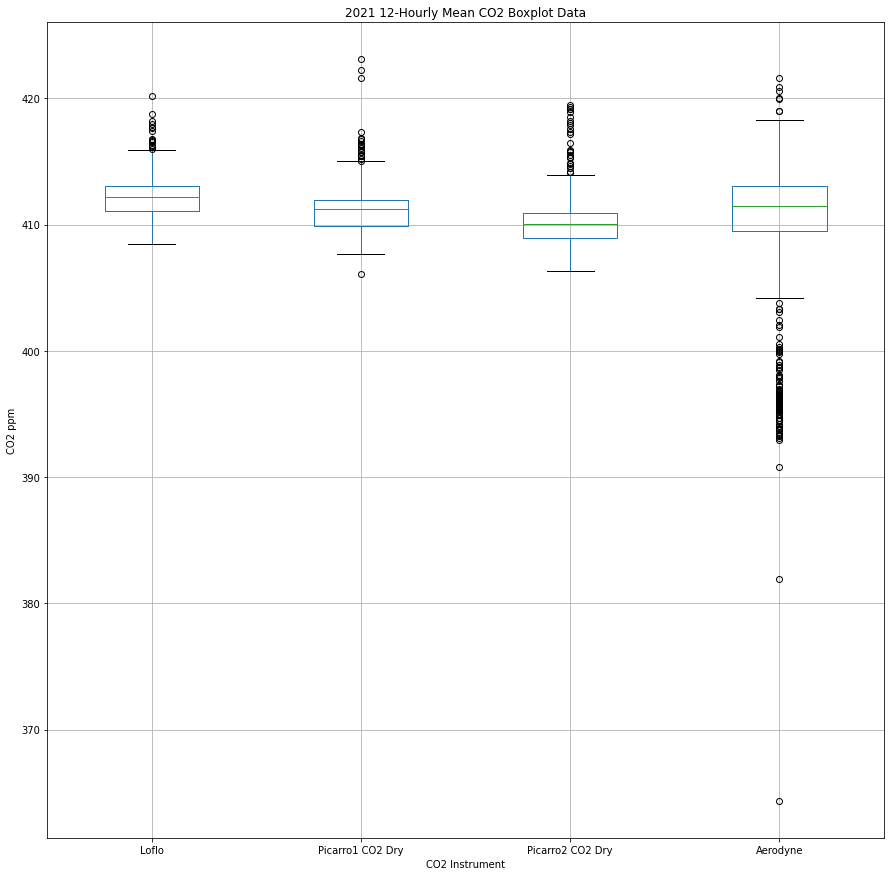

In [22]:
newHallmeandf.boxplot(column=['Loflo', 'Picarro1 CO2 Dry', 'Picarro2 CO2 Dry', 'Aerodyne'], figsize=(15,15))
plt.title('2021 12-Hourly Mean CO2 Boxplot Data')
plt.ylabel('CO2 ppm')
plt.xlabel('CO2 Instrument')
newHallmeandf['Aerodyne'].describe()

Using the dataset with flagged out points from the on-site vehicle times, the statistical values for the dataset barely changes. This could mean that either the human impact on CO2 levels within the lab is not enough to drastically change CO2 values or that all data is of poor quality if filtering out on-site times makes little difference. 

## Pre-2021 Data Analysis
As has been mentioned previously the dataset is full of many holes, this is why the 2021 period was selected for the primary data analysis because it contained the most continuous data. Since this data was shown to be poor in comparison to the other CO2 records, we will now try to analyse and data before 2021.

In [23]:
cleanaerodf.loc[cleanaerodf['626_C'].notna()]

,626_C
Date,
2019-09-24 00:00:00,410.388540
2019-09-24 00:01:00,409.937006
2019-09-24 00:02:00,409.645805
2019-09-24 00:03:00,409.566654
2019-09-24 00:04:00,410.177912
...,...
2022-07-11 23:56:00,409.129243
2022-07-11 23:57:00,409.103130
2022-07-11 23:58:00,409.032413


In [24]:
cleanaerodf.loc[cleanaerodf.index.date < date(2020,9,1)]

,626_C
Date,
2019-08-15 01:23:00,NaN
2019-08-15 01:24:00,NaN
2019-08-15 01:25:00,NaN
2019-08-15 01:26:00,NaN
2019-08-15 01:27:00,NaN
...,...
2020-06-20 00:02:00,400.657692
2020-06-20 00:03:00,402.491060
2020-06-20 00:04:00,403.173645


Using the graph in Section 1 and the above queries we can see that the continuous data ranges from 2019-09-24 until 2020-06-20

In [25]:
preaerodf = cleanaerodf
preaerodf = preaerodf.drop(preaerodf.loc[(preaerodf.index.date < date(2019, 9, 24)) | (preaerodf.index.date > date(2020, 6, 20))].index)
preaerodf.shape

(364354, 1)

In [26]:
prenewdf = df
prenewdf = prenewdf.drop(prenewdf.loc[(prenewdf['Date'].dt.date < date(2019, 9, 24)) | (prenewdf['Date'].dt.date > date(2020, 6, 20))].index)
prenewdf = prenewdf.reset_index(drop=True)
prenewdf = prenewdf.set_index('Date')
prenewdf['Loflo'] = pd.to_numeric(prenewdf['Loflo'], errors='coerce')
prenewdf['Picarro1 CO2 Dry'] = pd.to_numeric(prenewdf['Picarro1 CO2 Dry'], errors='coerce')
prenewdf['Picarro2 CO2 Dry'] = pd.to_numeric(prenewdf['Picarro2 CO2 Dry'], errors='coerce')
prenewdf = prenewdf.drop(prenewdf.loc[(prenewdf['Loflo'] >= 500) | (prenewdf['Loflo'] <= 350)].index)
prenewdf = prenewdf.drop(prenewdf.loc[(prenewdf['Picarro1 CO2 Dry'] >= 500) | (prenewdf['Picarro1 CO2 Dry'] <= 350)].index)
prenewdf = prenewdf.drop(prenewdf.loc[(prenewdf['Picarro2 CO2 Dry'] >= 500) | (prenewdf['Picarro2 CO2 Dry'] <= 350)].index)
prenewdf.head(), prenewdf.dtypes

(                     Loflo  Picarro1 CO2 Dry  Picarro2 CO2 Dry
 Date                                                          
 2019-09-24 00:00:00    NaN           407.312           406.413
 2019-09-24 00:01:00    NaN           407.305           406.417
 2019-09-24 00:02:00    NaN           407.301           406.406
 2019-09-24 00:03:00    NaN           407.279           406.380
 2019-09-24 00:04:00    NaN           407.271           406.393,
 Loflo               float64
 Picarro1 CO2 Dry    float64
 Picarro2 CO2 Dry    float64
 dtype: object)

In [27]:
Wmeanprenewdf = prenewdf.resample('W', label='right').mean()
Wmedprenewdf = prenewdf.resample('W', label='right').median()

Wmeanpreaerodf = preaerodf.resample('W', label='right').mean()
Wmedpreaerodf = preaerodf.resample('W', label='right').median()

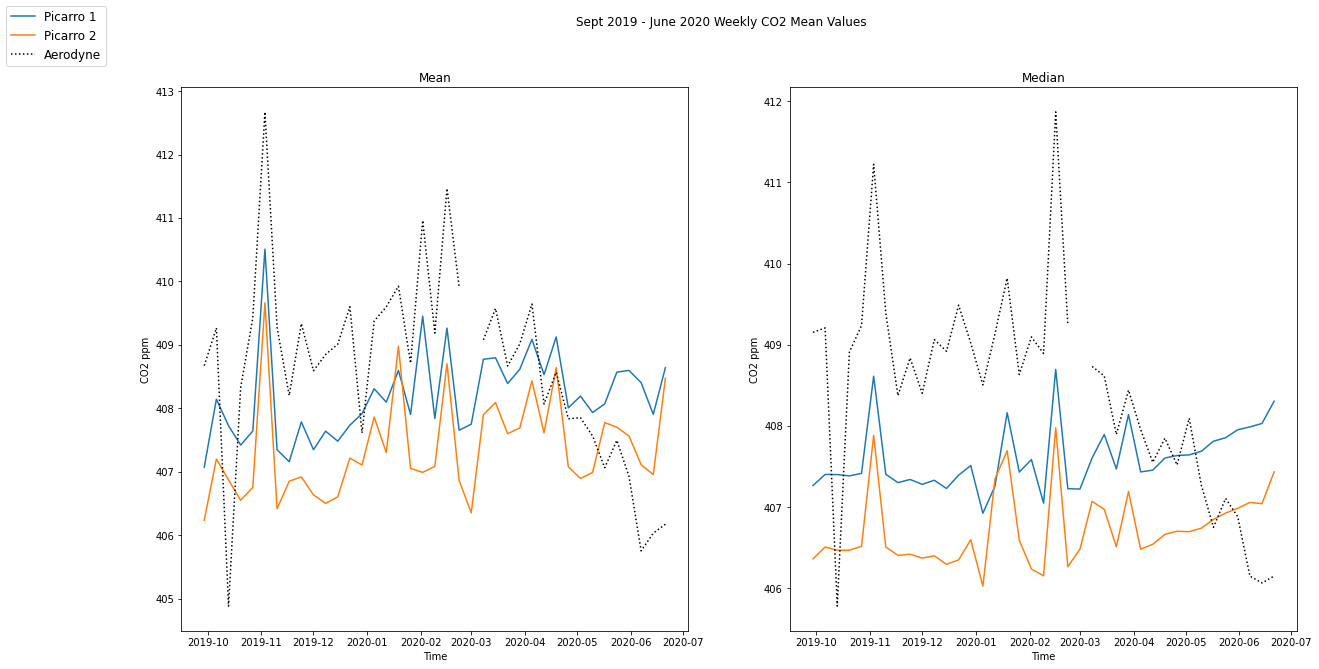

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(Wmeanprenewdf.index, Wmeanprenewdf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[0].plot(Wmeanprenewdf.index, Wmeanprenewdf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[0].plot(Wmeanpreaerodf.index, Wmeanpreaerodf['626_C'], label='Aerodyne', color='black', linestyle='dotted')
axs[0].set_title('Mean')

axs[1].plot(Wmedprenewdf.index, Wmedprenewdf['Picarro1 CO2 Dry'], label='Picarro 1')
axs[1].plot(Wmedprenewdf.index, Wmedprenewdf['Picarro2 CO2 Dry'], label='Picarro 2')
axs[1].plot(Wmedpreaerodf.index, Wmedpreaerodf['626_C'], label='Aerodyne', color='black', linestyle='dotted')
axs[1].set_title('Median')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', fontsize='large')
fig.suptitle('Sept 2019 - June 2020 Weekly CO2 Mean Values')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='CO2 ppm')

#### Initial Thoughts
This data shows some promise in the Aerodyne measurements. The magnitude difference is not a big worry as there is a similar difference between the two Picarro instruments. The Aerodyne has many similar trends but has the same issue as with other time periods being unusual patterns. Here the data follows nicely from 2019-11 until around 2020-04. Will do a boxplot to compare.

In [29]:
allpredf = prenewdf
allpredf['Aerodyne'] = preaerodf['626_C']

,Loflo,Picarro1 CO2 Dry,Picarro2 CO2 Dry,Aerodyne
Date,,,,
2019-09-24 00:00:00,NaN,407.312,406.413,410.388540
2019-09-24 00:01:00,NaN,407.305,406.417,409.937006
2019-09-24 00:02:00,NaN,407.301,406.406,409.645805
2019-09-24 00:03:00,NaN,407.279,406.380,409.566654
2019-09-24 00:04:00,NaN,407.271,406.393,410.177912


Text(0.5, 0, 'CO2 Instrument')

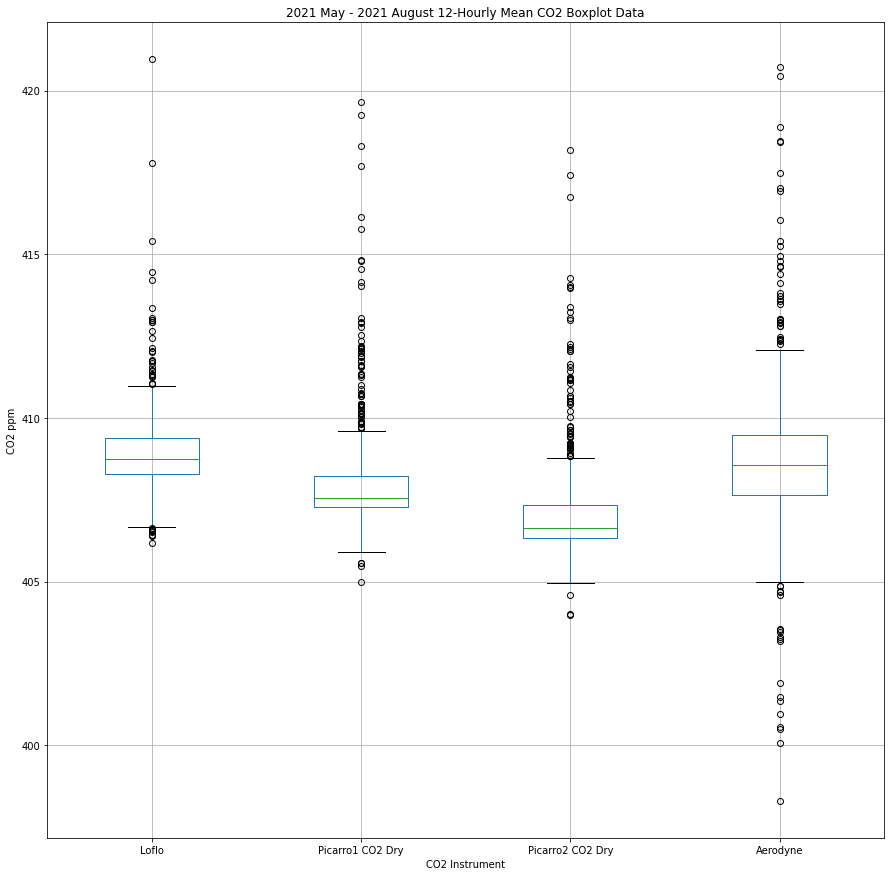

In [44]:
Hmeanallpredf = allpredf.resample('12H', label='right').mean()
Hmeanallpredf.boxplot(column=['Loflo', 'Picarro1 CO2 Dry', 'Picarro2 CO2 Dry', 'Aerodyne'], figsize=(15,15))
plt.title('2021 May - 2021 August 12-Hourly Mean CO2 Boxplot Data')
plt.ylabel('CO2 ppm')
plt.xlabel('CO2 Instrument')

#### Initial Thoughts
This date period seems slightly better than the 2021 period for the Aerodyne distributions. Instead of having a large number of lower outliers, it has the majority of its outliers above the median. This is a good sign for the data validity as it follows the same pattern as the known CO2 record in this case. In saying this it still contains far more lower ouliers, but it does point to the fact that the instrument is more reliable before reported fridge errors in the logbook.

# Summary
This report shows various statistical measures of the Aerodyne instrument in comparison to known good CO2 instruments. The Aerodyne instrument appears to be extremely fragile and problematic compared to the other CO2 instruments. Whilst at times it can produce data that follows similar patterns, maintaining this good data has proven to be time instensive and problematic. When cross-referencing bad data with the instrument logbook the main culprit of bad data is the fridge/dehumidification system. Coming to any concrete conclusion regarding this instrument is difficult as it has been fairly neglected in terms of fridge/leak maintenance, data consistency and calibration tank consistency. Even through these troubles there does seem to be potential in the data should the effort be put into restoring all systems of the instrument. The importance of having a CO2 isotopologue record at Cape Grim is the key question that will help determine whether the instrument is worth fixing. 

## Potential Path Forward
IF it is determined that it is worth some effort, time and money to further investigate the Aerodyne instrument rather than decommissioning it, then a plan is required. It is recommended that the whole fridge/dehumidification system be inspected, repaired and tested. It is also recommended that the fridge temperature probes be checked to ensure they can reliability produce temperature data 24/7. After these checks and fixes the system should have calibration runs as is protocol with the other instruments. After a decent time period (1 year minimum) of proper instrument maintenance another data analysis is recommended to see if the well looked-after instrument is comparable to the CO2 record.

Note: May get access to the whole Aerodyne df dating back to 2014 soon. This should be very useful in determining either when the Aerodyne data started to deviate from the CO2 record or if the data from the two instruments has ever been comparable.